In [24]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import kernel
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import copy
from svr_grid_search import Gridsearch

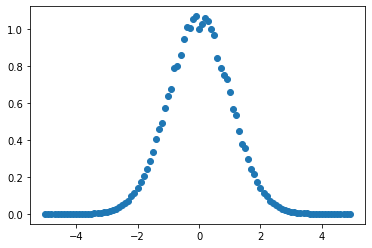

In [39]:
x = np.vstack(np.arange(-5,5,0.1))
noising_factor = 0.1
y = np.array([np.exp(-xi**2/2) for xi in x])
y = np.array([ yi + noising_factor * (np.random.rand()*yi) for yi in y])
plt.scatter(x,y)
plt.show()

In [50]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
        kernel=["rbf", "rbf", "rbf"],
        kparam=[{"gamma":3},{"gamma":1},{"gamma":2}],
        box=[0.1,1,10],
        eps=[0.05,0.1,0.5],
        optiargs=[{'eps':1e-2, 'maxiter': 3e3}, {'eps':5e-3, 'maxiter': 3e3}, {'eps':5e-4, 'maxiter': 3e3}, {'eps':1e-2, 'maxiter': 1e3}]
    )
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 108 models
(GS - SVR) - model 1/108
	(GS - SVR) - Time taken: 5.600002765655518 - Remaining: 599.2002959251404
(GS - SVR) - model 2/108
	(GS - SVR) - Time taken: 11.020037174224854 - Remaining: 584.0619702339172
(GS - SVR) - model 3/108
	(GS - SVR) - Time taken: 16.42200231552124 - Remaining: 574.7700810432434
(GS - SVR) - model 4/108
	(GS - SVR) - Time taken: 18.253002643585205 - Remaining: 474.57806873321533
(GS - SVR) - model 5/108
	(GS - SVR) - Time taken: 23.679004430770874 - Remaining: 487.78749127388005
(GS - SVR) - model 6/108
	(GS - SVR) - Time taken: 29.14400291442871 - Remaining: 495.44804954528814
(GS - SVR) - model 7/108
	(GS - SVR) - Time taken: 34.581003189086914 - Remaining: 498.95447458539695
(GS - SVR) - model 8/108
	(GS - SVR) - Time taken: 36.441001176834106 - Remaining: 455.51251471042633
(GS - SVR) - model 9/108
	(GS - SVR) - Time taken: 41.912015199661255 - Remaining: 461.03216719627375
(GS - SVR) - model 10/108
	

	(GS - SVR) - Time taken: 392.22498750686646 - Remaining: 130.74166250228882
(GS - SVR) - model 82/108
	(GS - SVR) - Time taken: 398.14098834991455 - Remaining: 126.23982557436315
(GS - SVR) - model 83/108
	(GS - SVR) - Time taken: 403.9589886665344 - Remaining: 121.674394176667
(GS - SVR) - model 84/108
	(GS - SVR) - Time taken: 405.9229905605316 - Remaining: 115.97799730300903
(GS - SVR) - model 85/108
	(GS - SVR) - Time taken: 412.0649871826172 - Remaining: 111.4999377082376
(GS - SVR) - model 86/108
	(GS - SVR) - Time taken: 418.3029873371124 - Remaining: 107.00774094670318
(GS - SVR) - model 87/108
	(GS - SVR) - Time taken: 424.4589910507202 - Remaining: 102.4556185294842
(GS - SVR) - model 88/108
	(GS - SVR) - Time taken: 426.63999128341675 - Remaining: 96.9636343825947
(GS - SVR) - model 89/108
	(GS - SVR) - Time taken: 432.859991312027 - Remaining: 92.40831275200576
(GS - SVR) - model 90/108
	(GS - SVR) - Time taken: 439.3489909172058 - Remaining: 87.86979818344116
(GS - SVR) -

(GS - SVR) - Fitting 60 models
(GS - SVR) - model 1/60
	(GS - SVR) - Time taken: 9.124998092651367 - Remaining: 538.3748874664307
(GS - SVR) - model 2/60
	(GS - SVR) - Time taken: 18.81199884414673 - Remaining: 545.5479664802551
(GS - SVR) - model 3/60
	(GS - SVR) - Time taken: 28.32599687576294 - Remaining: 538.1939406394958
(GS - SVR) - model 4/60
	(GS - SVR) - Time taken: 38.71756434440613 - Remaining: 542.0459008216858
(GS - SVR) - model 5/60
	(GS - SVR) - Time taken: 48.213566064834595 - Remaining: 530.3492267131805
(GS - SVR) - model 6/60
	(GS - SVR) - Time taken: 57.466564416885376 - Remaining: 517.1990797519684
(GS - SVR) - model 7/60
	(GS - SVR) - Time taken: 66.62756443023682 - Remaining: 504.46584497179305
(GS - SVR) - model 8/60
	(GS - SVR) - Time taken: 76.2925615310669 - Remaining: 495.9016499519348
(GS - SVR) - model 9/60
	(GS - SVR) - Time taken: 86.64356279373169 - Remaining: 490.98018916447955
(GS - SVR) - model 10/60
	(GS - SVR) - Time taken: 96.3335645198822 - Remai

T LOSS: [0.35926821]
V LOSS: 0


In [51]:
import time
start = time.time()
svr = SVR("rbf", {"gamma": 1.1788695113138572}, box=1)
svr.fit(x, y, {'eps': 0.031337730751507226, 'maxiter': 3000.0, 'vareps': 0.1}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

elapsed time 10.214987754821777


b: [0.13962373]
Gamma: 1.1788695113138572 - Box: 1
PREDICTION (INPUT = 12) [[0.13962373]]
LOSS: [0.35926821]


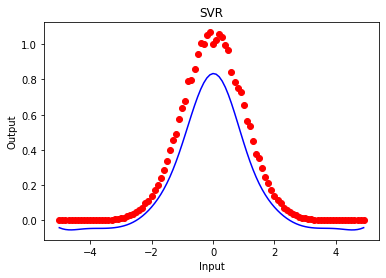

0.8812462473284755

In [52]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.0009624958038330078
 b: [0.23865905]
Gamma: scale - Box: 1.0
PREDICTION (INPUT = 12) [0.23861539]


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=70).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


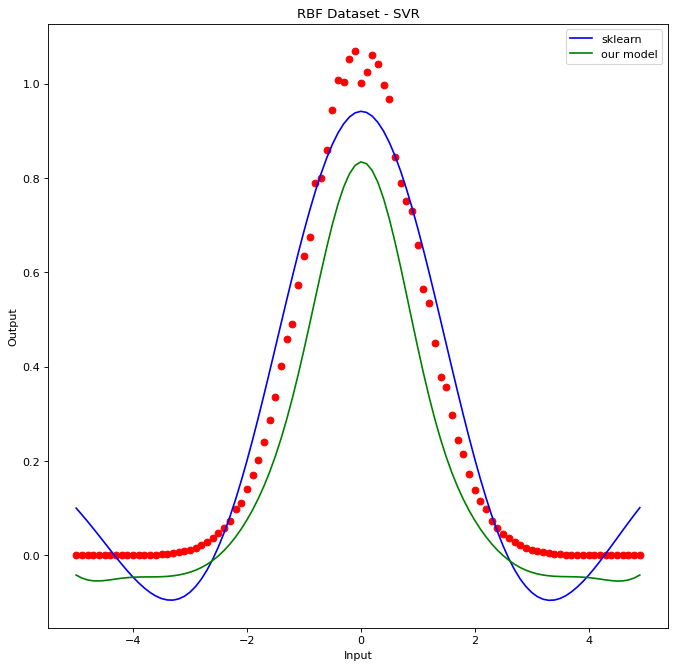

0.9572186664388616

In [67]:
import sklearn.svm as ss

import time
start = time.time()
regressor = ss.SVR(kernel = 'rbf',max_iter=70)

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# xs = sc_X.fit_transform(x)
# ys = sc_y.fit_transform(y)

regressor.fit(x, y.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
# print(f'PREDICTION (INPUT = {to_predict})', sc_y.inverse_transform(y_pred))
print(f'PREDICTION (INPUT = {to_predict})', y_pred)
sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('RBF Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [6]:
regressor.support_vectors_

array([[-1.5666989 ],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
regressor.support_

array([0, 6, 7, 8, 9])

In [8]:
regressor.epsilon

0.1

In [9]:
regressor.intercept_

array([0.02033234])

In [10]:
params = regressor.get_params()
params['gamma']

0.56

In [11]:
params['C']

1.0